##### Arjun Joshi
##### Capstone: Apollo Beach Model
##### 10.2024
<center> (As of 11.1.24, preprocessing is limited to a subset of data located at or in extreme proximity to the construction site evaluated in this study) </center>

####                     <center>TAMPA BAY BENTHOS ENVIRONMENTS DATASET </center><BR><center> [2: Cleaning, EDA, Feature Reduction] </center>
<center><img src='images/ApolloBeach.png' width="400" height="400" align="center"/><img src='images/stingray.png' width="400" height="400" align="center"/></center>

In [5]:
pwd

'J:\\Brainstation\\Capstone Git\\Apollo_Beach_Model - Copy\\notebooks'

#### Preface: <br>
_Benthos_ refers to organisms that live on the floor of aquatic environments. This project assumes data collected by the City of Tampa, Hillsborough County of Florida, the State of Florida, University of South Florida & other research institutions such as TBEP. This research is typically funded through government or acadmeic grants. While not a part of the analysis, that is described in the data.<br>

Benthos describe organisms that live within the sediment itself - such as polychaetes (worms), shellfish, echinoderms (starfish), various other invertebrates & more. Some important features of benthic data include sediment type, depth, species abundance and dominant species, toxicology.
<br>

Table of Contents:
1. Description of Data
2. Cleaning of Data, duplicates, nulls
3. Initial Aggregations of Data, Relationship Investigation (dirty work)
4. Preliminary Statistics & visualization
5. Feature analysis, selection, reduction. Correlation.
6. Next Steps

The purpose of this notebook is a fresh inspection of the data, prune it as needed, evaluate its credibility and accuracy through summary statistics and begin the process of refining the variables for use in modelling.
---



In [3]:
Out[5]: 
print('testing')

SyntaxError: invalid syntax (4054327342.py, line 1)

##### Features and Targets:

There are 2 feature targets being assessed in this data:
- TBBI (groundwork covered by TBEP)
- The Shannon Diversity Index. This is described in detail in the Readme.md in the repository. In summary, it is a normalized calculated value that can be assessed on any environment where the focus is on biological activity.
  


Shannon Diversity Index, Nekton, TBEP.
Source, cleaned data files are 8 data CSV and 1 dictionary CSV as the tables have been shortened for import into Pandas.

##### Description:

Here is introduced a compilation of **Benthic** ecosystem data and associated tables. There are 8 total dataframes/CSVs and 1 directory table. These are derived and consolidated from base/raw data tables. <br>

This preprocessing notebook shows cleaning, aggregation methodologies, preliminary exploration and analysis & completes with summary statistics used to help reduce/select features for use in construction of the final model.<br>

Of the 8 tables, primary weight and emphasis has been placed on a dataset labeled 'Biology Adjusted'. The data focuses on count of biological samples, species, calculated variables such as Species Richness and Dominant Species and weighted indicies used to describe the health quality of the ecosystem. This includes accompanying, informative data found in other tables - such as anthropogenic toxic compounds, heavy metals or pollution. <br>

This dataset incorporates a novel index called _Tampa Bay Benthic Index_(TBBI), created through the Tampa Bay Estuarine Program. For more information, please seek the references for the project. 
<br>
Multiple indicies exist for marine ecosystems found throughout Tampa Bay. For more information, please refer to the main readme file of the repository.

##### Context, Terminologies, Notes


 Species richness can be considered the "complexity" of the environment which can be used analytically to assess the relative 'developmental'  stage of an environment (it can be both growing or degrading), its health and as an indirect proxy, an indicator of resilience against selective pressures.
in order to isolate a target feature, the Shannon Diversity Index, which is used as the common and normalized feature across environment types. Most of these environments already have a novel index, formulated by TBEP, Univ. South Florida, Mote Marine Laboratory or others.

#### 

In [8]:
# Compile pkgs
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as stats
# import ggplot2 as gg

In [9]:
# Set wd if env was activated in another dir
os.chdir('J:\\Brainstation\\Capstone Git\\data\\PossibleDataSources\\Benthic Index\\Results')

---

##### Loading Data, Dictionary

In [10]:
# create dictionary in which dataframes will be stored
# 'bn' = 'Benthic'
bn = {}

In [11]:
# use glob to get list of csv
csv_files=glob.glob('*.csv')

In [12]:
df_names=pd.read_csv('b0_dir.csv')

In [13]:
csv_files

['ApolloBay_Benthic_Data.csv',
 'b0_dir.csv',
 'bBioAct_2.csv',
 'bBioAdj_1.csv',
 'bBioCollection_3.csv',
 'bBioHydro.csv',
 'bBio_L.csv',
 'bSedChem.csv',
 'bSedChem_L.csv',
 'bSilt.csv']

In [14]:
for file in csv_files:
    #file1=pd.read_csv(open(file,errors='replace'),encoding='cp1252',low_memory=False)
    bn[file[0:-4]]=pd.read_csv(open(file,errors='replace'),encoding='cp1252',low_memory=False)

In [15]:
bn.keys()

dict_keys(['ApolloBay_Benthic_Data', 'b0_dir', 'bBioAct_2', 'bBioAdj_1', 'bBioCollection_3', 'bBioHydro', 'bBio_L', 'bSedChem', 'bSedChem_L', 'bSilt'])

In [16]:
bBio_L=bn['bBio_L']

In [17]:
#df_names.drop(columns=df_names.columns[3:7],inplace=True)
for df_names.id in df_names:
        df_names.id

In [18]:
for x in df_names.renamed:
   #print(df_names.renamed[x][1:2])
    print(x)

b0_dir.csv,
 b1BioAdj.csv
 b2BioAct.csv
 b3BioCollection.csv
 b4Bio_L.csv
 b5SedChem.csv
 b6SedChem_L.csv
 b7BioHydro.csv
 b8Silt.csv


bn_stage={}
bn={}

In [19]:
for key in bn.keys():
    print(key)

ApolloBay_Benthic_Data
b0_dir
bBioAct_2
bBioAdj_1
bBioCollection_3
bBioHydro
bBio_L
bSedChem
bSedChem_L
bSilt


In [20]:
bn.keys()

dict_keys(['ApolloBay_Benthic_Data', 'b0_dir', 'bBioAct_2', 'bBioAdj_1', 'bBioCollection_3', 'bBioHydro', 'bBio_L', 'bSedChem', 'bSedChem_L', 'bSilt'])

In [21]:
bioadj=bn['bBioAdj_1']

---
---

### Part 1 -  Describe Data and Key Values

In [22]:
bioadj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4787 entries, 0 to 4786
Columns: 254 entries, ProgramName to DomSpecies2RelAbund
dtypes: float64(145), int64(2), object(107)
memory usage: 9.3+ MB


In [23]:
# Total of 4787 rows - going to use those to identify rows missing data or missing enough data for them to be dropped
# If column has no nulls, it was kept by default
bioadj.shape

(4787, 254)

In [24]:
# Check programs - will it impact usability?
# Must investigate 'Artifical Reef Study'

bioadj.ProgramName.value_counts()

ProgramName
Benthic Monitoring       4332
Dredge Hole Study         261
Artificial Reef Study     122
Tidal Streams 2006         72
Name: count, dtype: int64

**Partition data based on time** <br>
Segmenting DF to decade periods to make it easier to correlate to other, much larger datasets
Also can then test data, methods on a subset before applying it en masse
_(Edit: This will be applied at the end of preprocessing this dataset. Depending on the size of the data sets coming in from NOAA and/or the Fisheries )_

In [25]:
# Decades
print(bioadj.Year.min())
print(bioadj.Year.max())
bioadj_1990s=bioadj[bioadj.Year<=1999]
bioadj_2000s=bioadj[bioadj.Year.between(2000,2009, inclusive='both')]
bioadj_2010s=bioadj[bioadj.Year.between(2010,2019, inclusive='both')]
bioadj_working=bioadj[bioadj.Year>=2020]

1993
2022


In [26]:
bioadj_working

,ProgramName,FundingProject,AreaAbbr,AreaName,Hexagon,Year,SampleTime,StationID,StationNumber,Latitude,...,GeoMean_PEL_Ratio,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies1RelAbund,DomSpecies2,DomSpecies2RelAbund
4587,Benthic Monitoring,TBEP ...,BCB,Boca Ciega Bay,BCB10,2020,8/6/20 12:21,12979,20BCB10,27.823767,...,0.004496,67.20,Degraded,11.0,1978.0,0.70,Americorophium ellisi,0.304348,Streblospio spp.,0.239130
4588,Benthic Monitoring,TBEP ...,BCB,Boca Ciega Bay,BCB17,2020,8/10/20 10:20,12980,20BCB17,27.757750,...,0.000326,91.99,Healthy,59.0,5351.0,0.58,Branchiostoma floridae,0.261633,Chione elevata,0.098113
4589,Benthic Monitoring,TBEP ...,BCB,Boca Ciega Bay,BCB22,2020,8/10/20 12:55,12982,20BCB22,27.723083,...,0.092934,60.44,Degraded,1.0,125.0,0.00,Ophryotrocha sp.,1.000000,NaN,NaN
4590,Benthic Monitoring,TBEP ...,BCB,Boca Ciega Bay,BCB23,2020,8/10/20 12:00,12981,20BCB23,27.737517,...,0.002041,93.51,Healthy,60.0,5525.0,0.45,Clymenella mucosa,0.099548,Monocorophium acherusicum,0.090498
4591,Benthic Monitoring,TBEP ...,BCB,Boca Ciega Bay,BCB35,2020,8/10/20 14:10,12985,20BCB35,27.669767,...,0.003764,89.93,Healthy,57.0,5001.0,0.40,Branchiomma sp.,0.084983,Streblosoma hartmanae,0.074985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,Benthic Monitoring,TBEP-Special ...,LTB,Lower Tampa Bay,TB61,2022,8/22/22 10:14,13170,22PTF10,27.681600,...,0.000495,91.63,Healthy,51.0,7878.0,0.56,Caecum strigosum,0.453795,Caecum cf. bipartitum,0.082508
4783,Benthic Monitoring,TBEP-Special ...,LTB,Lower Tampa Bay,TB61,2022,8/22/22 12:50,13171,22PTF11,27.683133,...,0.002636,92.20,Healthy,66.0,4278.0,0.42,Fabricinuda trilobata,0.099345,Poecilochaetus johnsoni,0.070126
4784,Benthic Monitoring,TBEP-Special ...,LTB,Lower Tampa Bay,TB61,2022,8/22/22 13:55,13172,22PTF14,27.683400,...,0.003760,89.32,Healthy,52.0,3977.0,0.45,TELLININAE,0.125723,Caecum cf. bipartitum,0.069148
4785,Benthic Monitoring,TBEP-Special ...,LTB,Lower Tampa Bay,TB61,2022,8/22/22 11:28,13173,22PTF15,27.682317,...,0.000605,93.12,Healthy,53.0,6980.0,0.56,Caecum strigosum,0.390401,Caecum cf. bipartitum,0.075215


In [27]:
# No duplicated rows
bioadj.duplicated().value_counts()

False    4787
Name: count, dtype: int64

### Part 2 - Cleaning

**Targets**: Shannon Diversity Index, TBBI

**Key Features**:
- Location (Lat,Long,Area)
- Species Abundance, Richness
- Water Quality Metrics
 
Note: Dropping Columns.
- Decision to drop data columns followed process:
    -  If no nulls, kept
    -  Relevant to calculating feature? If no, drop.
    -  Evaluate quality of data being recorded, if deemed poor, dropped.
    -  Amount of data available of total rows? Needs context, by default if over 50%, dropped.
        - Can missing data be imputed? Does it need to be?


#### ?????

#### Check for missing data in columns required for future steps

In [28]:
# Check columns for null values
bioadj.isna().sum()==0
c0=0
c1=0
for col in bioadj.columns:
    if bioadj[col].isna().sum()==0:
        c0+=1
    else:
        c1+=1
print('No Nulls: ',c0)
print('Nulls: ',c1)

No Nulls:  12
Nulls:  242


In [29]:
nulls = pd.DataFrame({'colnum':[],'col':[],'nullcount':[]})
complete_col = pd.DataFrame({'colnum':[], 'col':[]})
for col in bioadj.columns:
    if bioadj[col].isna().sum()==0:
        complete_col.loc[len(complete_col)]=[col,bioadj.columns.get_loc(col)]
    else:
        nulls.loc[len(nulls)] = [col, bioadj.columns.get_loc(col), bioadj[col].isna().sum() ] 


In [30]:
bioadj.columns[248]

'AdjCountAbundance'

In [31]:
# Checking for patterns in null counts to inform missing data
# Dropping columns 12,14,30,32 for now - unless other data comes in that can inform those values
nulls.sort_values(by=['nullcount'],ascending=True).head(50)

,colnum,col,nullcount
28,Depth-B,38,40
30,Depth-BCat,40,40
23,Salinity-BCat,33,47
21,Sal-B,31,47
3,Temp-B,13,61
7,DO-B,17,100
10,DOp-B,20,100
26,Depth-T,36,103
1,Temp-T,11,109
17,pH-B,27,121


 A number of columns seem to have similar null counts starting around 1800
 There are quite a few reasons why this would happen - but for a preliminary analysis:
 Will evaluate columns with less than 600 missing data points.

 However, based on subject matter alone, we are highly likely to find large amounts of multicolinearity among those variables. They are similar in nature - metals, artificial chemical agents, etc.


In [32]:
dropcols=[12,14,30,32]

In [33]:
bioadj.drop(bioadj.columns[dropcols],axis=1, inplace=True)

In [34]:
complete_col

,colnum,col
0,ProgramName,0
1,FundingProject,1
2,AreaAbbr,2
3,AreaName,3
4,Year,5
5,SampleTime,6
6,StationID,7
7,StationNumber,8
8,Latitude,9
9,Longitude,10


In [35]:
# Sanity Check
bioadj.head(5)

,ProgramName,FundingProject,AreaAbbr,AreaName,Hexagon,Year,SampleTime,StationID,StationNumber,Latitude,...,GeoMean_PEL_Ratio,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies1RelAbund,DomSpecies2,DomSpecies2RelAbund
0,Benthic Monitoring,TBEP ...,HB,Hillsborough Bay,HB34,1993,9/14/93 11:33,2452,93HB03,27.874001,...,NaN,68.84,Degraded,8.0,275.0,0.66,Paraprionospio sp.,0.272727,Sigambra tentaculata,0.181818
1,Benthic Monitoring,TBEP ...,HB,Hillsborough Bay,HB26,1993,9/13/93 12:37,2453,93HB04,27.875000,...,NaN,57.33,Degraded,9.0,8175.0,0.29,Carazziella hobsonae,0.856269,ENTEROPNEUSTA,0.055046
2,Benthic Monitoring,TBEP ...,HB,Hillsborough Bay,HB25,1993,9/9/93 12:17,2454,93HB05,27.867001,...,NaN,66.98,Degraded,53.0,19425.0,0.62,Kurtiella planulata,0.305019,Ampelisca holmesi,0.123552
3,Benthic Monitoring,TBEP ...,HB,Hillsborough Bay,HB25,1993,9/9/93 13:37,2455,93HB06,27.858000,...,NaN,15.18,Degraded,56.0,24225.0,0.65,Mediomastus sp.,0.220846,Mediomastus cf. ambiseta,0.187822
4,Benthic Monitoring,TBEP ...,HB,Hillsborough Bay,HB32,1993,9/9/93 15:00,2456,93HB07,27.850201,...,NaN,63.30,Degraded,12.0,350.0,0.56,Turbonilla cf. conradi,0.142857,Prionospio perkinsi,0.142857


_Are these measurements actually useful? Need to evaluate in terms of target feature. The aim EPC-HC for their sediment analysis table is species abundance, calculating the Shannon Diversity Index and Tampa Bay Benthic Index (TBBI)_

<font color='red'><center> At the end of processing other data sets, must come back and cross-reference to missing data here. <br>
                    TBBI Crossreferences with EPC-HC for their sediment analysis</center></font>

Certain data described by these columns could be useful - such as salinity, depth, silt, DOQ, PH - all continuous values. Certain features can be translated into categorical (making a decision to keep it in a lot easier) based on the relative importance of the missing data.
- For example, Mercury has only 47 rows of data. Absence of values can be important statistic rather than a criteria for being dropped.
    - This too still must be evaluated. Right now target is diversity index.


The data, variables, categories of data need to be carefully selected and applied in a larger context - TBBI is only one source of data and will need to be translated/transformed to fit with other data sources. 

- Within this notebook, we will focus on species diversity, richness & abundance - and those quantifications.
- Focus feature is SDI and dominant species - which will need to be referenced to academic papers on trophic system species analysis.



In [36]:
bioadj.columns[1]

'FundingProject'

In [37]:
nulls[nulls.nullcount==4787].value_counts()

colnum   col  nullcount
SalQ-B   32   4787         1
SalQ-T   30   4787         1
TempQ-B  14   4787         1
TempQ-T  12   4787         1
Name: count, dtype: int64

In [38]:
# Location data check.
# Null hexagons is fine
print(bioadj.Latitude.isna().value_counts())
print(bioadj.Longitude.isna().value_counts())
print(bioadj.Hexagon.isna().value_counts())
print(bioadj.StationID.isna().value_counts())
print(bioadj.StationNumber.isna().value_counts())

Latitude
False    4787
Name: count, dtype: int64
Longitude
False    4787
Name: count, dtype: int64
Hexagon
False    2659
True     2128
Name: count, dtype: int64
StationID
False    4787
Name: count, dtype: int64
StationNumber
False    4787
Name: count, dtype: int64


In [39]:
# Clarification on Sampling Sites - minor variations in GPS can be addresed by rounding to 0.001
# This is one possible point of consolidation - however, it can likely be aggregated on stationID - but that much isn't clear yet
bioadj[['Latitude','Longitude']].nunique()
print(round(bioadj.Latitude,3).nunique())
print(round(bioadj.Longitude,3).nunique())

568
518


In [40]:
# Date data check: No missing dates
print(bioadj.Year.isna().value_counts())
print(bioadj.SampleTime.isna().value_counts())

Year
False    4787
Name: count, dtype: int64
SampleTime
False    4787
Name: count, dtype: int64


In [41]:
# Calculated value check
print(bioadj.Hexagon.isna().value_counts())

Hexagon
False    2659
True     2128
Name: count, dtype: int64


In [42]:
bioadj.SampleTime

0       9/14/93 11:33
1       9/13/93 12:37
2        9/9/93 12:17
3        9/9/93 13:37
4        9/9/93 15:00
            ...      
4782    8/22/22 10:14
4783    8/22/22 12:50
4784    8/22/22 13:55
4785    8/22/22 11:28
4786     9/19/22 9:48
Name: SampleTime, Length: 4787, dtype: object

In [43]:
pd.to_datetime(bioadj.SampleTime,format='mixed')

0      1993-09-14 11:33:00
1      1993-09-13 12:37:00
2      1993-09-09 12:17:00
3      1993-09-09 13:37:00
4      1993-09-09 15:00:00
               ...        
4782   2022-08-22 10:14:00
4783   2022-08-22 12:50:00
4784   2022-08-22 13:55:00
4785   2022-08-22 11:28:00
4786   2022-09-19 09:48:00
Name: SampleTime, Length: 4787, dtype: datetime64[ns]

In [44]:
bioadj.SampleTime=pd.to_datetime(bioadj.SampleTime,format='mixed')

#### Consolidation of Data - Investigation of Data, Examine Relationships, preliminary visualizations.

In [45]:
bioadj.head(1)
[[
'SampleTime',
'TBBI',
'TBBICat',
'SpeciesRichness',
'AdjCountAbundance',
'ShannonDiversity',
'DomSpecies1',
'DomSpecies2',
'DomSpecies1RelAbund',
'DomSpecies2RelAbund',
'AreaName',
'Hexagon',
'Year',
'StationID',
'StationNumber',
'Latitude',
'Longitude',
'Temp-T',
'Temp-B',
'DO-B',
'DOp-T'
'DOp-B',
'Cond-T',
'pH-T',
'pH-B',
'Sal-T',
'Sal-B',
'Depth-Bcat',
'GeoMean-PEL-Ratio']]

[['SampleTime',
  'TBBI',
  'TBBICat',
  'SpeciesRichness',
  'AdjCountAbundance',
  'ShannonDiversity',
  'DomSpecies1',
  'DomSpecies2',
  'DomSpecies1RelAbund',
  'DomSpecies2RelAbund',
  'AreaName',
  'Hexagon',
  'Year',
  'StationID',
  'StationNumber',
  'Latitude',
  'Longitude',
  'Temp-T',
  'Temp-B',
  'DO-B',
  'DOp-TDOp-B',
  'Cond-T',
  'pH-T',
  'pH-B',
  'Sal-T',
  'Sal-B',
  'Depth-Bcat',
  'GeoMean-PEL-Ratio']]

In [46]:
## Get all columns that fit initial conditions established re: missing data
nulls_under_600=nulls[nulls.nullcount<600][['colnum','col']]

In [47]:
pd.concat([nulls_under_600,complete_col.col], ignore_index=True)

,colnum,col,0
0,Temp-T,11.0,NaN
1,Temp-B,13.0,NaN
2,DO-T,15.0,NaN
3,DO-B,17.0,NaN
4,DOp-T,19.0,NaN
5,DOp-B,20.0,NaN
6,pH-T,25.0,NaN
7,pH-B,27.0,NaN
8,Sal-T,29.0,NaN
9,Sal-B,31.0,NaN


In [48]:
prelim_col=pd.concat([nulls_under_600,complete_col])

In [49]:
# Create a df with refined columns of interest based on data availability
bioadj_refined=bioadj[prelim_col.colnum]
bioadj_refined.head()//

SyntaxError: invalid syntax (703152331.py, line 3)

In [50]:
bioadj.head(1)

,ProgramName,FundingProject,AreaAbbr,AreaName,Hexagon,Year,SampleTime,StationID,StationNumber,Latitude,...,GeoMean_PEL_Ratio,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies1RelAbund,DomSpecies2,DomSpecies2RelAbund
0,Benthic Monitoring,TBEP ...,HB,Hillsborough Bay,HB34,1993,1993-09-14 11:33:00,2452,93HB03,27.874001,...,NaN,68.84,Degraded,8.0,275.0,0.66,Paraprionospio sp.,0.272727,Sigambra tentaculata,0.181818


In [51]:
bioadj_base=bioadj[[
'SampleTime',
'TBBI',
'TBBICat',
'SpeciesRichness',
'AdjCountAbundance',
'ShannonDiversity',
'DomSpecies1',
'DomSpecies2',
'DomSpecies1RelAbund',
'DomSpecies2RelAbund',
'AreaName',
'Hexagon',
'Year',
'StationID',
'StationNumber',
'Latitude',
'Longitude',
'Temp-T',
'Temp-B',
'DO-B',
'DOp-T',
'DOp-B',
'Cond-T',
'pH-T',
'pH-B',
'Sal-T',
'Sal-B',
'Depth-BCat',
'GeoMean_PEL_Ratio']]

#### Base Tables
**Setting 3 stages of aggregation...** <br>
After moving into the data, sampling isn't equally distributed through time. <br>
Subset tables:
- **bioadj[]**:   Tampa Bay (base table 'bioadj', all values)
- **MiddleBay[]**:  Middle Tampa Bay (subsection of TB, see map)
- **bApollo[]**:  (benthic) Apollo Beach: GPS Coordinates}
    - Lat:(_27.7630 - 27.8114_)
    - Long:(_-82.4560,-82.4014_)

In [52]:
# Need to aggregate at a slightly higher level
print(bioadj.AreaName.value_counts())

# Select Area - Apollo Becah is part of Middle Tampa Bay
MiddleBay=bioadj[bioadj.AreaName=='Middle Tampa Bay']

# Get info
MiddleBay.info()

AreaName
Middle Tampa Bay        638
Old Tampa Bay           623
Hillsborough Bay        601
McKay Bay               481
Boca Ciega Bay          420
Alafia River            409
Lower Tampa Bay         371
Hillsborough River      296
Little Manatee River    255
Palm River              239
Manatee River           228
Terra Ceia Bay          166
Lake Thonotosassa        30
Clearwater Harbor        15
St. Joseph Sound         15
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 47 to 4769
Columns: 250 entries, ProgramName to DomSpecies2RelAbund
dtypes: datetime64[ns](1), float64(141), int64(2), object(106)
memory usage: 1.2+ MB


In [53]:
bApollo=bioadj_base[bioadj_base.Longitude.between(-82.4560,-82.4014,inclusive='both') & bioadj_base.Latitude.between(27.7630,27.8114,inclusive='both')]

In [54]:
bApollo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 12 to 4742
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SampleTime           266 non-null    datetime64[ns]
 1   TBBI                 266 non-null    float64       
 2   TBBICat              266 non-null    object        
 3   SpeciesRichness      266 non-null    float64       
 4   AdjCountAbundance    266 non-null    float64       
 5   ShannonDiversity     266 non-null    float64       
 6   DomSpecies1          259 non-null    object        
 7   DomSpecies2          256 non-null    object        
 8   DomSpecies1RelAbund  266 non-null    float64       
 9   DomSpecies2RelAbund  263 non-null    float64       
 10  AreaName             266 non-null    object        
 11  Hexagon              78 non-null     object        
 12  Year                 266 non-null    int64         
 13  StationID            266 non-null    i

####  Part 3? Unsorted.

In [55]:
bApollo_plots=bApollo.copy()

In [56]:
bApollo_plots.SampleTime_Dt=bApollo_plots.SampleTime

C:\Users\Ajax\AppData\Local\Temp\ipykernel_34176\3261503145.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bApollo_plots.SampleTime_Dt=bApollo_plots.SampleTime


In [57]:
bApollo_plots.SampleTime_Dt=pd.to_datetime(bApollo_plots.SampleTime, format='mixed')

In [58]:
bApollo_plots.SampleTime_Dt

12     1993-09-08 16:34:00
103    1994-09-09 08:25:00
153    1994-09-08 09:00:00
234    1995-09-28 11:08:00
235    1995-09-28 09:10:00
               ...        
4470   2018-08-06 09:40:00
4611   2020-08-11 11:38:00
4612   2020-08-11 10:15:00
4614   2020-08-11 10:56:00
4742   2022-08-03 12:07:00
Name: SampleTime, Length: 266, dtype: datetime64[ns]

In [59]:
bApollo_plots[bApollo_plots.SampleTime.isna()==True]

,SampleTime,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies2,DomSpecies1RelAbund,DomSpecies2RelAbund,...,DO-B,DOp-T,DOp-B,Cond-T,pH-T,pH-B,Sal-T,Sal-B,Depth-BCat,GeoMean_PEL_Ratio


In [60]:
bApollo_plots.head(1)

,SampleTime,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies2,DomSpecies1RelAbund,DomSpecies2RelAbund,...,DO-B,DOp-T,DOp-B,Cond-T,pH-T,pH-B,Sal-T,Sal-B,Depth-BCat,GeoMean_PEL_Ratio
12,1993-09-08 16:34:00,63.49,Degraded,34.0,7775.0,0.58,Branchiostoma floridae,Mediomastus sp.,0.514469,0.102894,...,4.36,111.6,66.8,NaN,8.12,7.82,25.0,27.4,Deep,0.018515


In [61]:
bApollo_plots.Year

12      1993
103     1994
153     1994
234     1995
235     1995
        ... 
4470    2018
4611    2020
4612    2020
4614    2020
4742    2022
Name: Year, Length: 266, dtype: int64

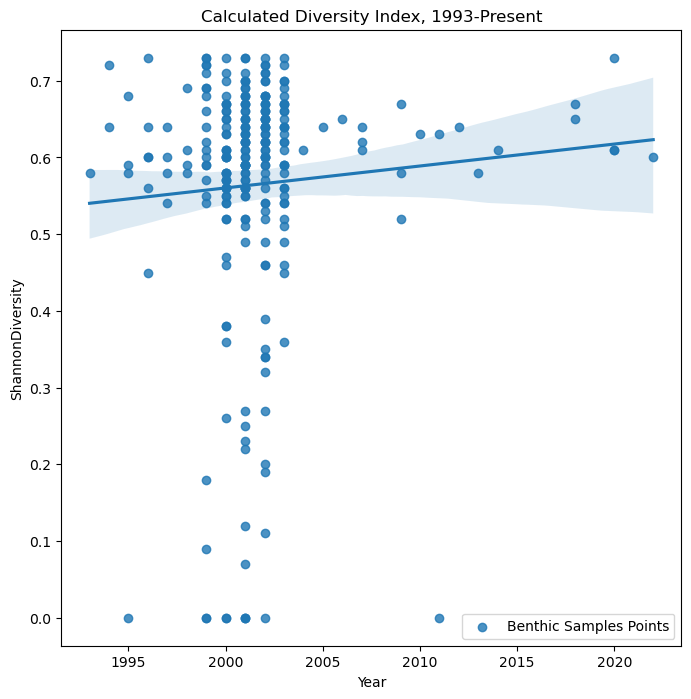

In [62]:
plt.figure(figsize=(8,8))
sns.regplot(x=bApollo_plots.Year, 
             y=bApollo_plots.ShannonDiversity,
             #y=bApollo.ShannonDiversity.rolling(7).mean()
             data=bApollo,
            label='Benthic Samples Points'
            )
plt.legend()
plt.title('Calculated Diversity Index, 1993-Present')
plt.show()

In [63]:
bApollo_plots.SampleTime

12     1993-09-08 16:34:00
103    1994-09-09 08:25:00
153    1994-09-08 09:00:00
234    1995-09-28 11:08:00
235    1995-09-28 09:10:00
               ...        
4470   2018-08-06 09:40:00
4611   2020-08-11 11:38:00
4612   2020-08-11 10:15:00
4614   2020-08-11 10:56:00
4742   2022-08-03 12:07:00
Name: SampleTime, Length: 266, dtype: datetime64[ns]

In [68]:
bApollo.set_index(bApollo.SampleTime)

,SampleTime,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies2,DomSpecies1RelAbund,DomSpecies2RelAbund,...,DO-B,DOp-T,DOp-B,Cond-T,pH-T,pH-B,Sal-T,Sal-B,Depth-BCat,GeoMean_PEL_Ratio
SampleTime,,,,,,,,,,,,,,,,,,,,,
1993-09-08 16:34:00,1993-09-08 16:34:00,63.49,Degraded,34.0,7775.0,0.58,Branchiostoma floridae,Mediomastus sp.,0.514469,0.102894,...,4.36,111.6,66.8,NaN,8.12,7.82,25.00,27.40,Deep,0.018515
1994-09-09 08:25:00,1994-09-09 08:25:00,79.05,Intermediate,45.0,10175.0,0.64,Branchiostoma floridae,Caecum strigosum,0.302211,0.140049,...,4.90,80.7,71.0,NaN,7.90,7.90,21.90,22.00,Deep Subtidal,0.009088
1994-09-08 09:00:00,1994-09-08 09:00:00,85.40,Intermediate,28.0,2925.0,0.72,Caecum strigosum,Litocorsa ewingi,0.324786,0.282051,...,4.50,75.2,66.5,NaN,7.90,7.90,23.40,23.50,Intermediate Subtidal,0.062415
1995-09-28 11:08:00,1995-09-28 11:08:00,89.41,Healthy,36.0,15125.0,0.58,Arcuatula papyria,Ampelisca holmesi,0.476033,0.100826,...,4.86,95.7,72.1,NaN,8.07,7.98,19.30,19.70,Intermediate Subtidal,0.000255
1995-09-28 09:10:00,1995-09-28 09:10:00,0.00,Empty Sample,0.0,0.0,0.00,NaN,NaN,0.000000,0.000000,...,0.30,48.8,4.6,NaN,7.92,7.40,19.20,20.00,Deep Subtidal,0.014004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-06 09:40:00,2018-08-06 09:40:00,96.22,Healthy,66.0,59575.0,0.65,Kirkegaardia sp.,Glottidia pyramidata,0.375157,0.151070,...,0.36,65.3,5.4,33800.0,8.19,7.87,21.33,22.00,Deep Subtidal,0.001744
2020-08-11 11:38:00,2020-08-11 11:38:00,90.80,Healthy,55.0,67000.0,0.73,Caecum pulchellum,Caecum strigosum,0.417537,0.361194,...,5.19,103.8,81.8,40500.0,8.12,8.05,26.12,26.58,Deep Subtidal,0.000499
2020-08-11 10:15:00,2020-08-11 10:15:00,86.22,Intermediate,59.0,15101.0,0.61,Glottidia pyramidata,Prionospio perkinsi,0.269850,0.122508,...,3.05,90.1,48.4,41200.0,8.03,7.90,26.64,26.74,Deep Subtidal,0.001054


---
##### Dummies: Species and AreaName

In [70]:
#pd.get_dummies(bApollo.columns[])

In [71]:
featcol=[10,13.15,17,21,23,25,26,27,28,30,32,35,36]

In [72]:
bApollo[bApollo.columns[[13,15,17,21,23,25,26,27,28,30,32,35,36]]]

IndexError: index 30 is out of bounds for axis 0 with size 29

In [73]:
# bApollo_sub[bApollo_sub.DomSpecies1.isna()==True]

In [74]:
dummies_col=bApollo_sub.columns[[13,15,17,21,23,25,26,27,28,30,32,35,36]]
dummies_col

NameError: name 'bApollo_sub' is not defined

In [75]:
#decomposition = tsa.seasonal_decompose([bApollo1.SampleTime,bApollo['SpeciesRichness']],model='additive')

In [76]:

#from statsmodels.api import tsa # time series analysis
#import statsmodels.api as sm
#decomposition_Richness=tsa.seasonal_decompose([bApollo['SampleTime'],bApollo['SpeciesRichness']],model='additive')

In [77]:
# bApollo.sort_index(inplace=True,freq='None')
# ALl unique sample times, creating datetime index
# bApollo.SampleTime.value_counts()

---

In [78]:
bApollo1=bApollo.copy()

In [79]:
bApollo1.SampleTime=pd.to_datetime(bApollo1.SampleTime)

In [80]:
bApollo[bApollo.ShannonDiversity>.3]

,SampleTime,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies2,DomSpecies1RelAbund,DomSpecies2RelAbund,...,DO-B,DOp-T,DOp-B,Cond-T,pH-T,pH-B,Sal-T,Sal-B,Depth-BCat,GeoMean_PEL_Ratio
12,1993-09-08 16:34:00,63.49,Degraded,34.0,7775.0,0.58,Branchiostoma floridae,Mediomastus sp.,0.514469,0.102894,...,4.36,111.6,66.8,NaN,8.12,7.82,25.00,27.40,Deep,0.018515
103,1994-09-09 08:25:00,79.05,Intermediate,45.0,10175.0,0.64,Branchiostoma floridae,Caecum strigosum,0.302211,0.140049,...,4.90,80.7,71.0,NaN,7.90,7.90,21.90,22.00,Deep Subtidal,0.009088
153,1994-09-08 09:00:00,85.40,Intermediate,28.0,2925.0,0.72,Caecum strigosum,Litocorsa ewingi,0.324786,0.282051,...,4.50,75.2,66.5,NaN,7.90,7.90,23.40,23.50,Intermediate Subtidal,0.062415
234,1995-09-28 11:08:00,89.41,Healthy,36.0,15125.0,0.58,Arcuatula papyria,Ampelisca holmesi,0.476033,0.100826,...,4.86,95.7,72.1,NaN,8.07,7.98,19.30,19.70,Intermediate Subtidal,0.000255
275,1995-09-28 10:22:00,75.82,Intermediate,7.0,250.0,0.68,Batea catharinensis,Ampelisca holmesi,0.300000,0.200000,...,0.28,47.5,4.3,NaN,7.53,7.32,19.10,19.80,Intermediate Subtidal,0.096100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2018-08-06 09:40:00,96.22,Healthy,66.0,59575.0,0.65,Kirkegaardia sp.,Glottidia pyramidata,0.375157,0.151070,...,0.36,65.3,5.4,33800.0,8.19,7.87,21.33,22.00,Deep Subtidal,0.001744
4611,2020-08-11 11:38:00,90.80,Healthy,55.0,67000.0,0.73,Caecum pulchellum,Caecum strigosum,0.417537,0.361194,...,5.19,103.8,81.8,40500.0,8.12,8.05,26.12,26.58,Deep Subtidal,0.000499
4612,2020-08-11 10:15:00,86.22,Intermediate,59.0,15101.0,0.61,Glottidia pyramidata,Prionospio perkinsi,0.269850,0.122508,...,3.05,90.1,48.4,41200.0,8.03,7.90,26.64,26.74,Deep Subtidal,0.001054
4614,2020-08-11 10:56:00,83.73,Intermediate,60.0,11701.0,0.61,Glottidia pyramidata,Kirkegaardia sp.,0.188018,0.158106,...,3.79,78.2,60.5,41300.0,7.95,7.95,26.76,26.68,Deep Subtidal,0.008503


<br>**TIME SERIES ANALYSIS**: Must be continuous at regular intervals, non-stacking. Cannot easily apply unless transformed or normalized as is

##### Reduction of Columns

In [81]:
bApollo_sub_reduced=bApollo[bApollo.columns[[0,1,8,9,11,12,16,17,18,19,20,21,22,23,24,29,30]]]

IndexError: index 29 is out of bounds for axis 0 with size 29

In [82]:
bApollo[[
'SampleTime',
'TBBI',
'TBBICat',
'SpeciesRichness',
'AdjConuntAbundance',
'ShannonDiversity',
'DomSpecies1',
'DomSpecies2',
'DomSpecies1RelAbund',
'DomSpecies2RelAbund',
'AreaName',
'Hexagon',
'Year',
'StationID',
'StationNumber',
'Latitude',
'Longitude',
'Temp-T',
'Temp-B',
'DO-B',
'DOp-T'
'DOp-B',
'Cond-T',
'pH-T',
'pH-B',
'Sal-T',
'Sal-B',
'Depth-Bcat',
'GeoMean-PEL-Ratio']]

KeyError: "['AdjConuntAbundance', 'DOp-TDOp-B', 'Depth-Bcat', 'GeoMean-PEL-Ratio'] not in index"

In [83]:
bApollo_sub_reduced[['DomSpeices1','DomSpecies2','TBBICat']]

NameError: name 'bApollo_sub_reduced' is not defined

In [84]:
bApollo_sub.dtypes

NameError: name 'bApollo_sub' is not defined

In [85]:
for col in bApollo_sub.columns:
    if bApollo_sub[col].dtype=='object' :
        print(bApollo_sub[col].nunique())


NameError: name 'bApollo_sub' is not defined

In [86]:
bApollo_dummies=pd.get_dummies(bApollo[dummies_col])

NameError: name 'dummies_col' is not defined

In [87]:
bApollo_dummies

NameError: name 'bApollo_dummies' is not defined

In [88]:
pd.get_dummies(bApollo_sub[['DomSpecies1','DomSpecies2','TBBICat']])

NameError: name 'bApollo_sub' is not defined

#### Visualizations

In [89]:
bApollo_sub1

NameError: name 'bApollo_sub1' is not defined

In [90]:
sns.histplot(bApollo[bApollo.columns[[0,1,8,9,11,12,16,17,18,19,20,21,22,23,24,29,30]]].ShannonDiversity)

IndexError: index 29 is out of bounds for axis 0 with size 29

<Axes: xlabel='SpeciesRichness', ylabel='Count'>

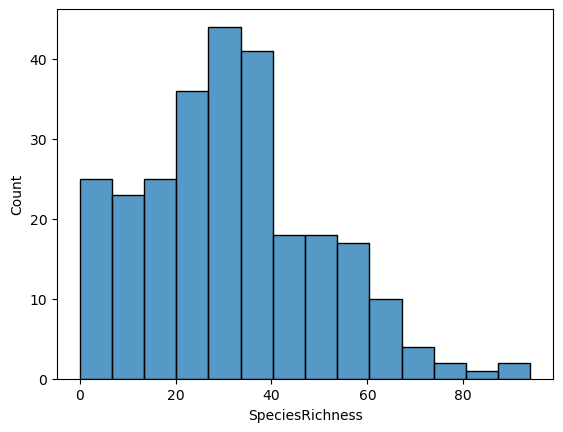

In [91]:
sns.histplot(bApollo.SpeciesRichness)

266


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

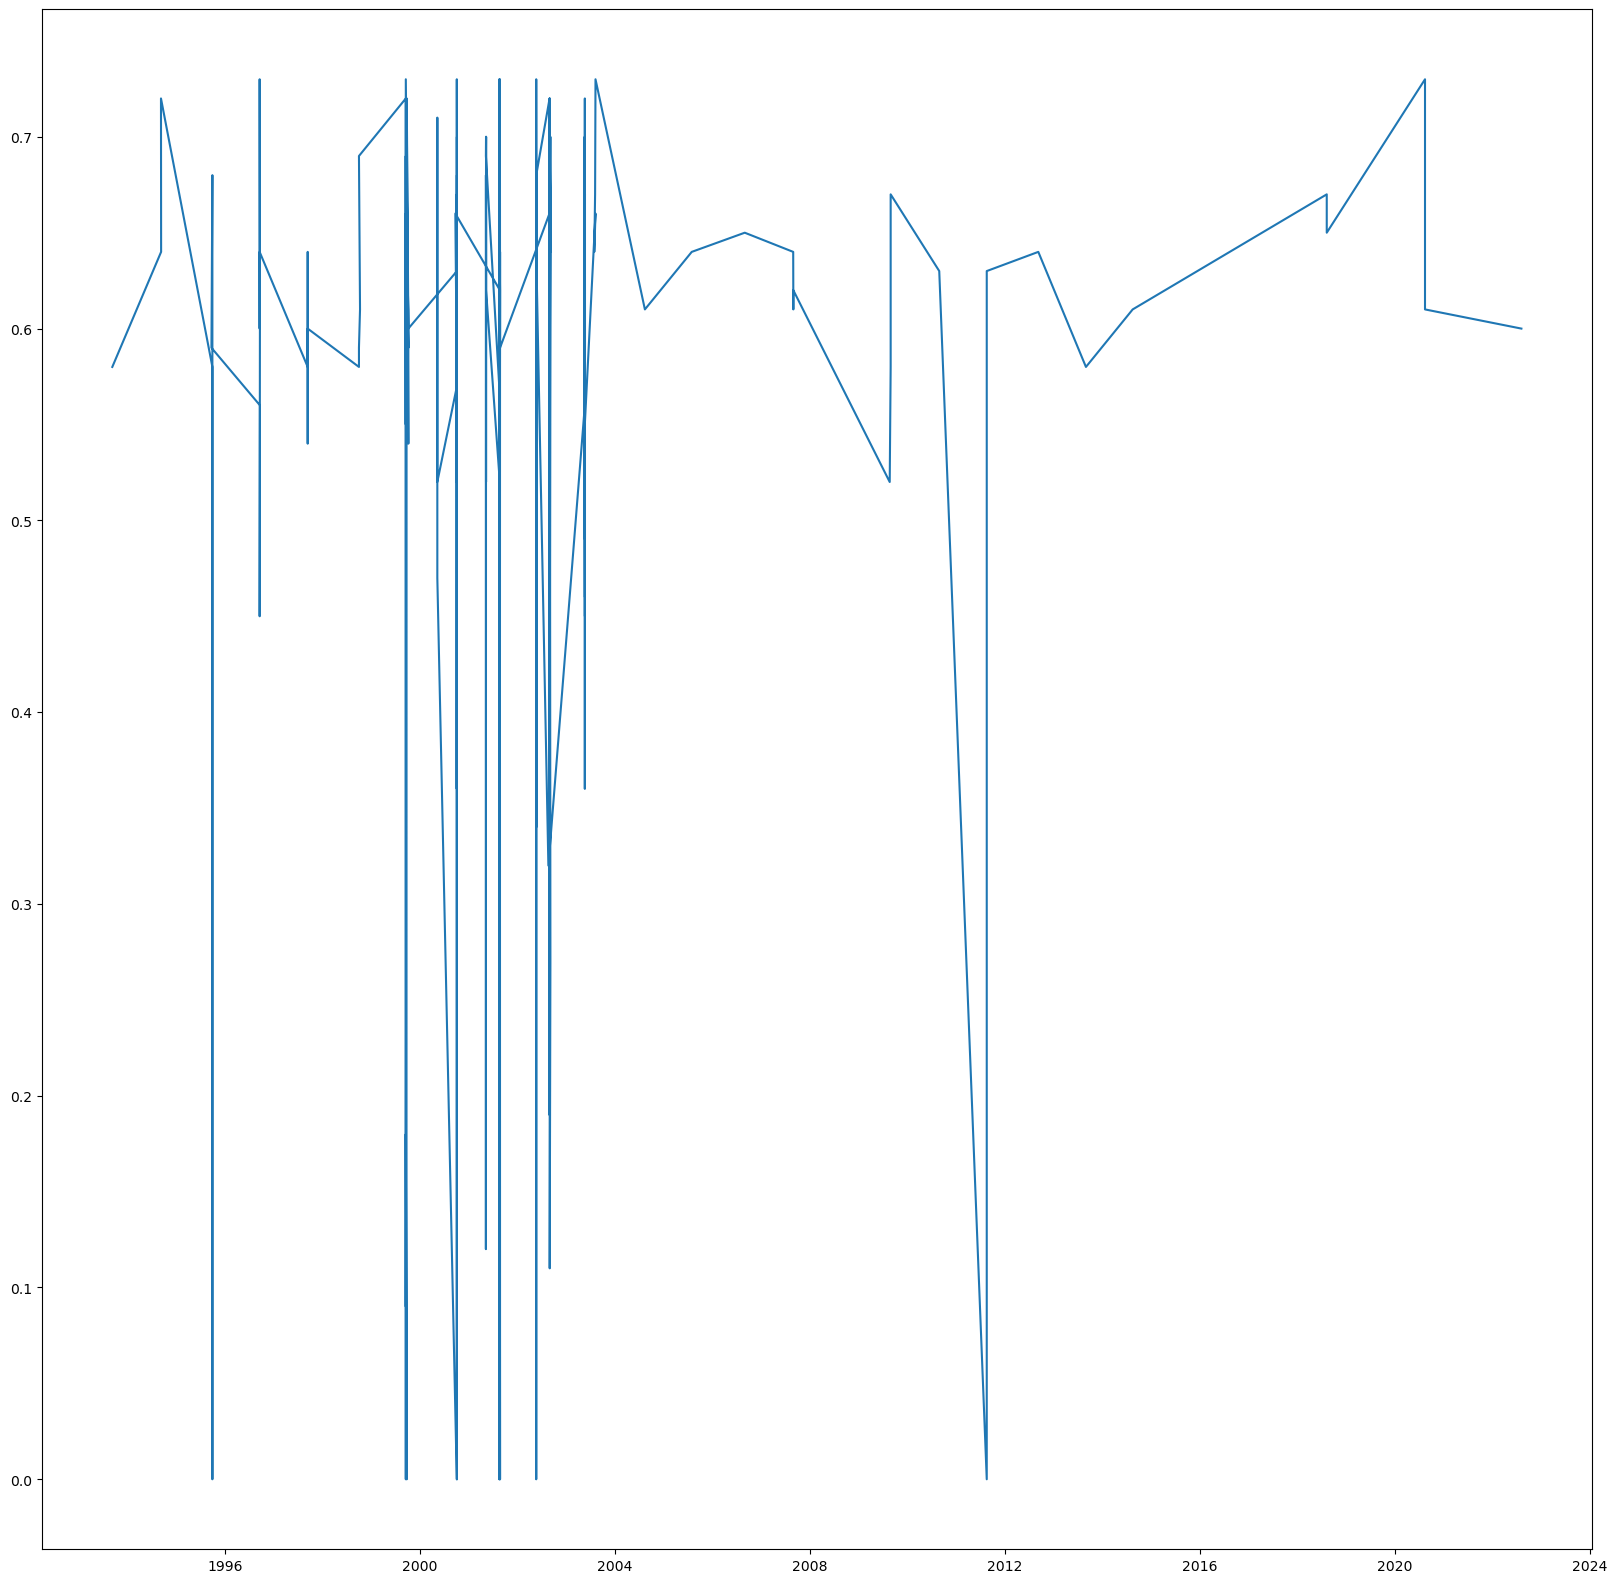

In [92]:
#bApollo[bApollo.columns[[0,1,8,9,11,12,16,17,18,19,20,21,22,23,24,29,30]]]
#bApollo['mvg_avg_SDIndex']=
plt.figure(figsize=(20,20))
plt.plot(bApollo.SampleTime, bApollo.ShannonDiversity)
print(len(bApollo))
plt.xticks

<Axes: xlabel='SampleTime', ylabel='ShannonDiversity'>

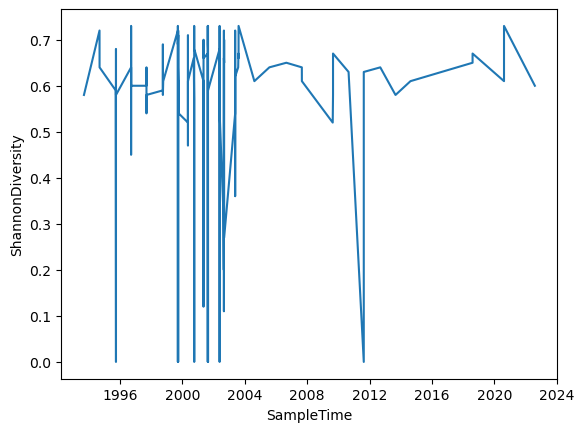

In [93]:
import seaborn as sns
# Plot the responses for different events and regions
sns.lineplot(x=bApollo_plots.SampleTime_Dt,y=bApollo_plots.ShannonDiversity)

In [94]:
bApollo_plots[bApollo_plots.ShannonDiversity==0]

,SampleTime,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies2,DomSpecies1RelAbund,DomSpecies2RelAbund,...,DO-B,DOp-T,DOp-B,Cond-T,pH-T,pH-B,Sal-T,Sal-B,Depth-BCat,GeoMean_PEL_Ratio
235,1995-09-28 09:10:00,0.00,Empty Sample,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.30,48.8,4.6,NaN,7.92,7.40,19.20,20.00,Deep Subtidal,0.014004
806,1999-09-16 10:09:00,60.44,Degraded,1.0,50.0,0.0,Laeonereis cf. longula,NaN,1.0,NaN,...,5.17,86.0,83.8,NaN,7.92,7.91,23.80,23.70,Intertidal,0.004571
814,1999-09-23 09:08:00,0.00,Empty Sample,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,3.48,73.3,51.4,NaN,8.16,7.93,24.00,24.20,Deep Subtidal,0.221324
1070,2000-10-03 13:25:00,0.00,Empty Sample,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,4.64,86.3,68.8,NaN,7.93,7.88,28.00,28.00,Deep,NaN
1088,2000-10-02 09:06:00,60.20,Degraded,1.0,25.0,0.0,Kirkegaardia sp.,NaN,1.0,NaN,...,0.64,46.7,10.0,NaN,7.42,7.13,25.36,27.29,Deep Subtidal,NaN
1354,2001-08-20 10:00:00,0.00,Empty Sample,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,1.77,39.3,30.5,NaN,7.78,7.67,26.30,26.40,Deep,0.023057
1357,2001-08-22 09:08:00,60.22,Degraded,1.0,25.0,0.0,NAIDIDAE,NaN,1.0,NaN,...,2.44,57.0,38.3,NaN,7.88,7.83,26.90,27.00,Deep,0.005838
1410,2001-08-16 09:46:00,0.00,Empty Sample,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.37,72.9,5.7,NaN,7.88,7.59,25.40,27.90,Deep,0.001382
1658,2002-05-20 10:15:00,0.00,Empty Sample,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,3.88,NaN,65.9,46000.0,7.80,7.81,29.90,29.90,Deep Subtidal,NaN
3816,2011-08-16 08:59:00,0.00,Empty Sample,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.13,121.6,2.1,37400.0,8.31,7.02,23.93,26.62,Deep,0.005834


In [95]:
# Apollo Beach: Missing Year 2008,2015-2017
bApollo_plots.Year.value_counts().sort_index()

Year
1993     1
1994     2
1995     4
1996     6
1997     4
1998     4
1999    22
2000    46
2001    63
2002    59
2003    34
2004     1
2005     1
2006     1
2007     3
2009     3
2010     1
2011     2
2012     1
2013     1
2014     1
2018     2
2020     3
2022     1
Name: count, dtype: int64

Text(0.5, 1.0, '')

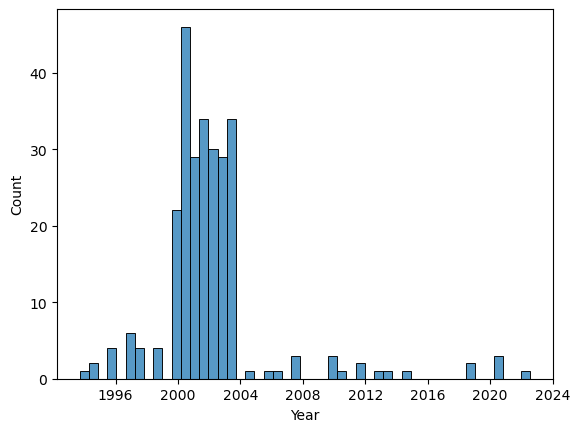

In [96]:
sns.histplot(bApollo_plots.SampleTime_Dt)
plt.xlabel('Year')
plt.title('')

Text(0.5, 0.98, 'Diversity Index & Distribution by Year')

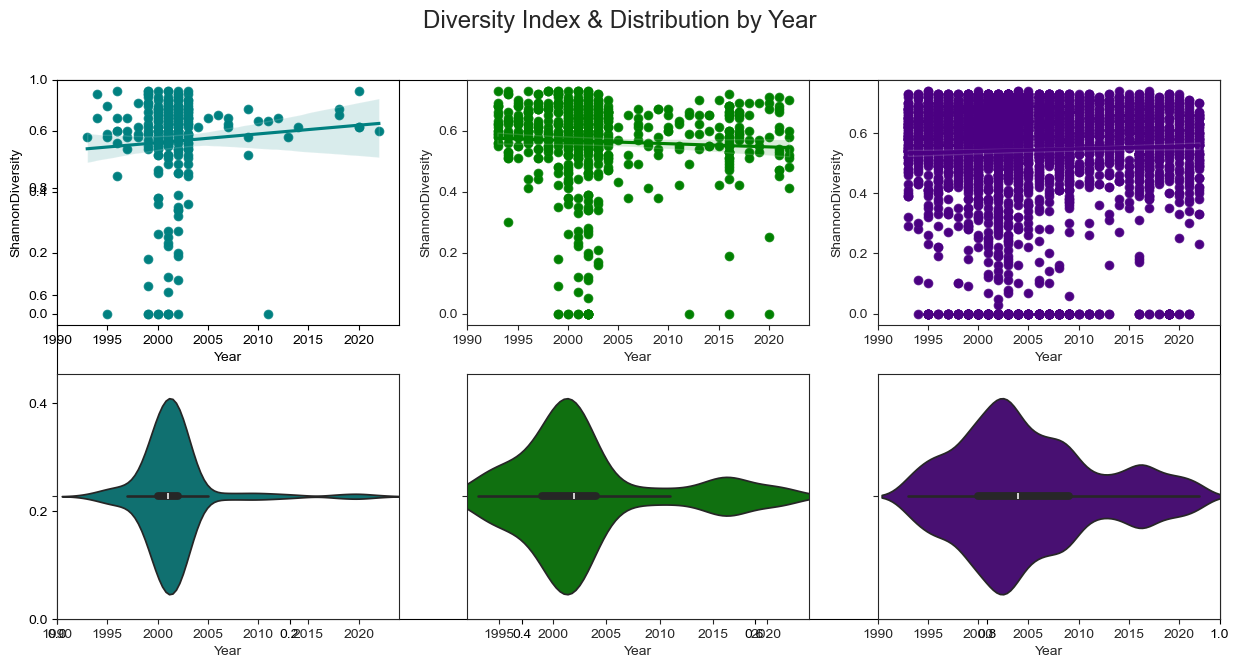

In [97]:
## Not very much info the way we want it, over time
fig, ax1 = plt.subplots(figsize=(15,7))
fig.add_subplot(231)
#plt.tight_layout()
#sns.scatterplot(x=bApollo_plots.SampleTime_Dt,y=bApollo_plots.ShannonDiversity, ax=ax1)
sns.scatterplot(x=bApollo_plots.Year,y=bApollo_plots.ShannonDiversity, color='teal')
sns.regplot(x=bApollo_plots.Year,y=bApollo_plots.ShannonDiversity, color='teal')
sns.set_style("ticks")
plt.xlim(1990,2024)

fig.add_subplot(232)
#plt.tight_layout()
sns.scatterplot(x=MiddleBay.Year,y=MiddleBay.ShannonDiversity, color='green')
sns.regplot(x=MiddleBay.Year,y=MiddleBay.ShannonDiversity, color='green')
plt.xlim(1990,2024)

fig.add_subplot(233)
#plt.tight_layout()
sns.scatterplot(x=bioadj.Year,y=bioadj.ShannonDiversity, color='indigo')
sns.regplot(x=bioadj.Year,y=bioadj.ShannonDiversity, color='indigo')
plt.xlim(1990,2024)

fig.add_subplot(234)
#plt.tight_layout()
sns.violinplot(x=bApollo_plots.Year,color='teal')
plt.xlim(1990,2024)

fig.add_subplot(235)
#plt.tight_layout()
sns.violinplot(x=MiddleBay.Year,color='green')
plt.xlim(1992,2024)

fig.add_subplot(236)
#plt.tight_layout()
sns.violinplot(x=bioadj.Year,color='indigo')
plt.xlim(1990,2024)
plt.suptitle('Diversity Index & Distribution by Year',fontsize='xx-large')

In [98]:
os.chdir('J:\\Brainstation\\Capstone Git\\Apollo_Beach_Model\\Sprint1')

In [99]:
bApollo_sub1=bApollo.drop(columns=[
    'TBBICat',
    'DomSpecies1',
    'DomSpecies2',
    'AreaName',
    'Hexagon',
    'StationID',
    'StationNumber',
    'Depth-BCat'])

C:\Users\Ajax\AppData\Local\Temp\ipykernel_34176\385415054.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


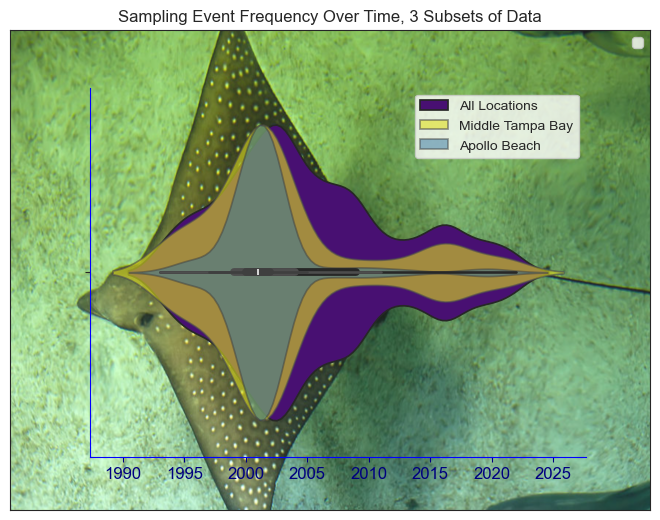

In [100]:
## Just for fun. Because the violin plots look so much like stingrays
image = plt.imread('images/stingray.png')

fig, ax1 = plt.subplots()
sns.violinplot(x=bioadj.Year, color='indigo', label='All Locations')
sns.violinplot(x=MiddleBay.Year, color='yellow',alpha=0.6, label='Middle Tampa Bay')
sns.violinplot(x=bApollo_plots.Year,alpha=0.5,label='Apollo Beach')
plt.subplots_adjust()
background_ax = plt.axes([0, 0, 1, 1]) # create a dummy subplot for the background
background_ax.axes.get_xaxis().set_ticks([])
background_ax.axes.get_yaxis().set_ticks([])
background_ax.set_zorder(-1) # set the background subplot behind the others
background_ax.imshow(image, aspect='auto',alpha=0.9) # show the backgroud image
ax1.patch.set_alpha(0)

ax1.spines['bottom'].set_color('blue')
ax1.spines['left'].set_color('blue')
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.xaxis.label.set_color('none')
ax1.tick_params(axis='x', colors='navy',labelsize='large')
#fig.tight_layout()
plt.legend()
plt.title('Sampling Event Frequency Over Time, 3 Subsets of Data')
plt.show()

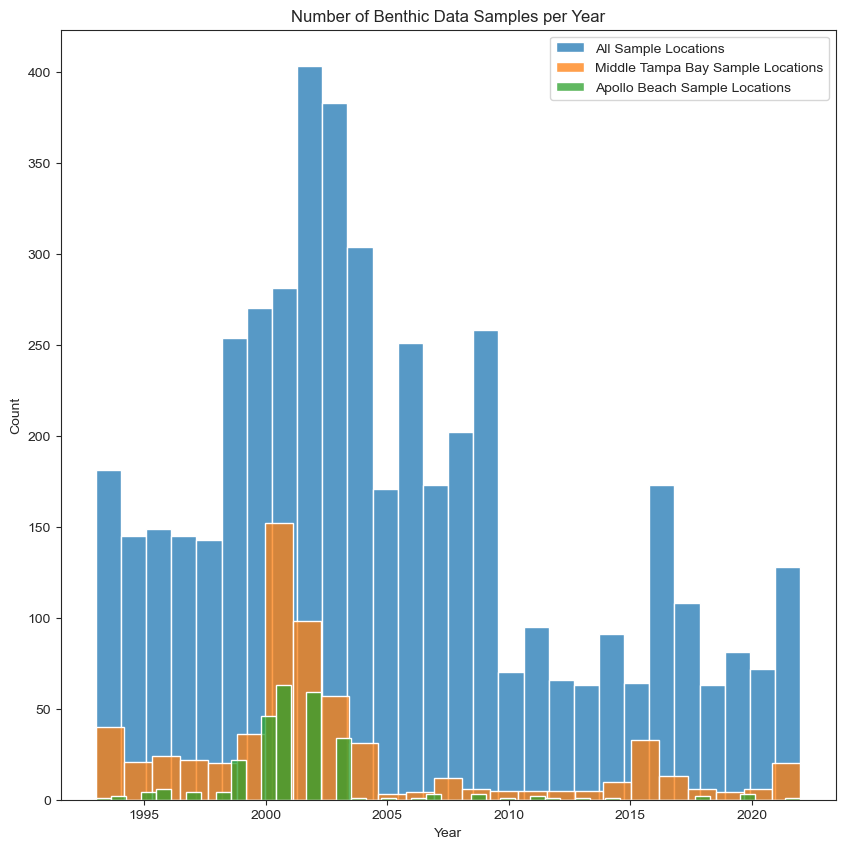

In [101]:
plt.subplots(figsize=(10,10))
plt.subplot(111)
sns.histplot(bioadj.Year, label='All Sample Locations')
sns.histplot(MiddleBay.Year, label= 'Middle Tampa Bay Sample Locations')
sns.histplot(bApollo_plots.Year, label='Apollo Beach Sample Locations')
plt.title('Number of Benthic Data Samples per Year')
plt.legend()
plt.show()

> This is the sampling events per year for the entire bay and 2 subsets. The samples are heavily weighted towards the early 2000s - presumably funding. When evaluated in an overall context, it's clear that efforts were redirected to other parts of the bay but the overall trend remains the same. The study has to monitor localized environments which means keeping an eye on this will be very important to ensure models are accurate.
> Apollo Beach: Zero data points for some years. Some of that is a lack of sampling events, some of it a lack of abundance or data values to record
> Middle Tampa Bay: About as sparse as Apollo Beach.
> All: there are still some relatively low sampling years.

(1992.0, 2024.0)

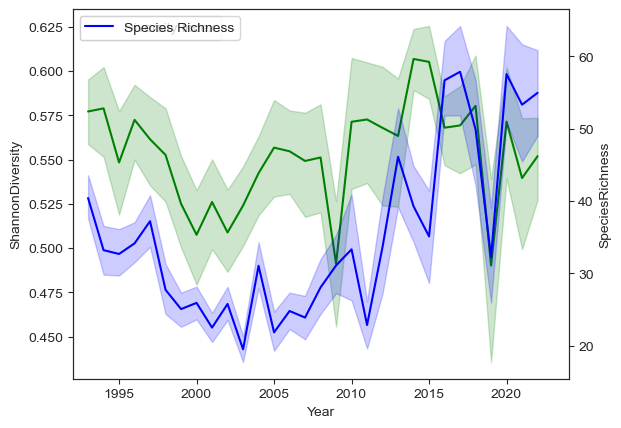

In [102]:
# Looking into health proxy values to determine relationship to sampling events
fig, ax1 = plt.subplots()
sns.lineplot( x=bioadj.Year,y=bioadj.ShannonDiversity,ax=ax1, color='green',label='Diversity Index')
ax2=ax1.twinx()
sns.lineplot( x=bioadj.Year,y=bioadj.SpeciesRichness,ax=ax2,color='blue', label='Species Richness')
plt.legend()
plt.xlim(1992,2024)

> They seem to be inversely correlated and makes sense. When diversity was low and overall ecosystem health was poor, monitoring was much more intense and less so when it became healthier.
> The diversity index ends up getting back to when the data sampling started. Lows in the mid 2000s, peaking in 2015 and trending downwards again
> Richness, though following basic trends, seems to have maintained an upwards trend. This is based on limited data - but it can be interpreted in 2 ways: 1- if richness is high but abundance is low, it could indicate negative selection pressures or 2 - an abundance of one species is heavily weighing against the richness - skewed distribution.
> I can't, using this data set, effectively assess abundance distribution however, I can look at the correlation between richness and diversity closer

C:\Users\Ajax\AppData\Local\Temp\ipykernel_34176\2694786019.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


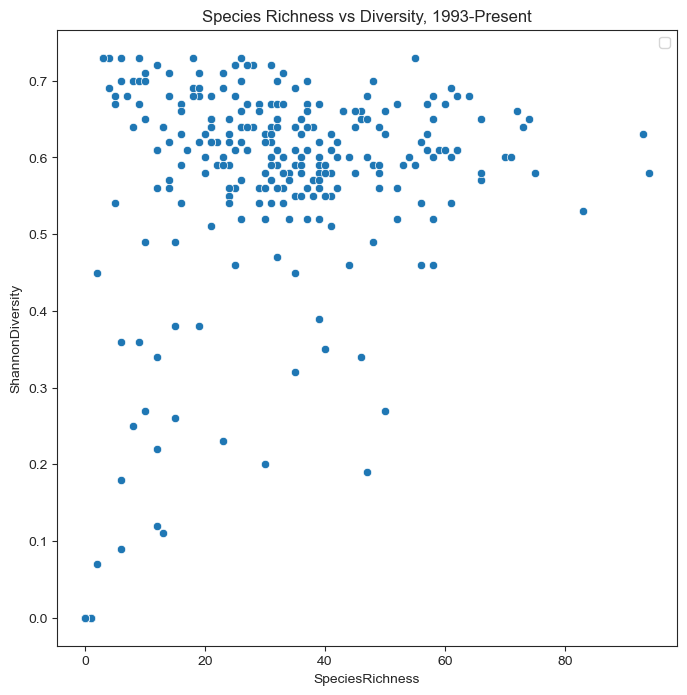

In [103]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=bApollo_plots.SpeciesRichness, 
             y=bApollo_plots.ShannonDiversity,
             #y=bApollo.ShannonDiversity.rolling(7).mean()
             data=bApollo
            )
plt.legend()
plt.title('Species Richness vs Diversity, 1993-Present')
plt.show()

> Data points at the origin are few and heavily clumped at a high diversity but at vary richness. It will require more insight to provide an accurate analysis

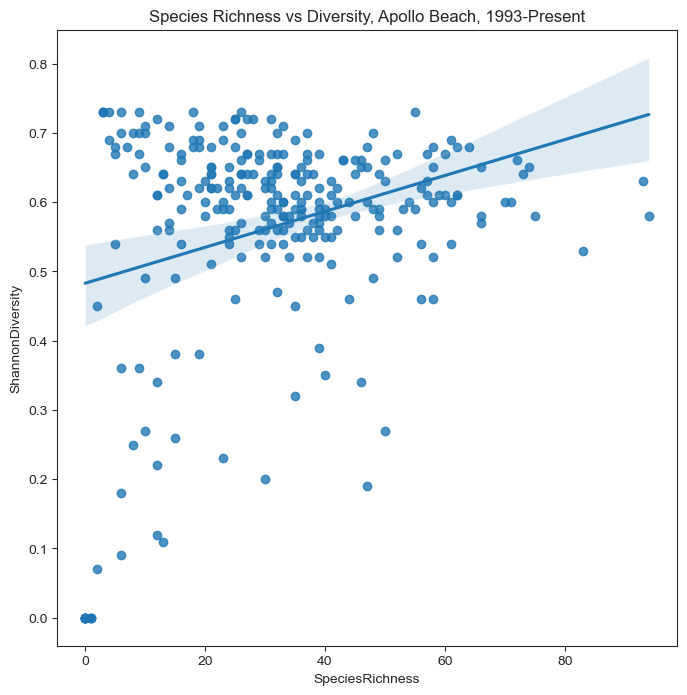

In [104]:
plt.figure(figsize=(8,8))
sns.regplot(x=bApollo_plots.SpeciesRichness, 
             y=bApollo_plots.ShannonDiversity,
             #y=bApollo.ShannonDiversity.rolling(7).mean()
             data=bApollo
            )
plt.title('Species Richness vs Diversity, Apollo Beach, 1993-Present')
plt.show()

> A non-normalized, without penalty linear regression. That needs to be done before more can be inferred given the sparsity of data in certain places.

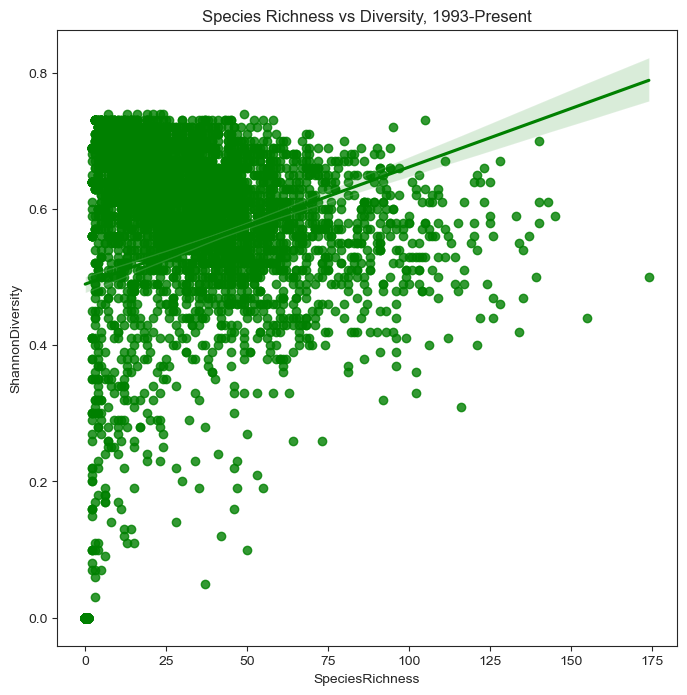

In [105]:
plt.figure(figsize=(8,8))
sns.regplot(x=bioadj.SpeciesRichness, 
             y=bioadj.ShannonDiversity,
             #y=bApollo.ShannonDiversity.rolling(7).mean()
             data=bApollo, color='green'
            )
plt.title('Species Richness vs Diversity, 1993-Present')
plt.show()

> This could be just as misleading with any type of regression without being normalized given how concentrated the measurements are. The scale of Richness is 10**2+ greater. Suffice it to say, right now, that it's likely that richness is positively correlated to diversity

### Part 4 - Advanced Stats, Feature Selection/Reduction

#### Dominant Species:

The benthic study in just this local ecosystem has over 265 dominants species over the course of data collection. It would be ideal to select "indicator" or "keystone" species which are a weighted representation of ecosystem health but that clearly has fluctuated since 1993. Since there needs to be a way to keep identification invovled while aggregating - Phylum has been chosen as the specificity to identify organisms (taxonomic classification vs significance) and allow for dummy variables without losing too much information.



In [ ]:
#bApollo_sub.DomSpecies1.value_counts()

In [ ]:
bApollo_sub1=bApollo_plots.drop(columns=(['DomSpecies1','DomSpecies2','TBBICat','AreaName','HEXAGON']))

In [ ]:
bApollo_plots

In [ ]:
# Left join with base table for species definition.
# Need to find a way to group species at a higher level to include it in correlation analysis

bApollo_sub_SppMerge=bApollo_sub.merge(bBaseTaxaList, how='left', left_on='DomSpecies1',right_on='NAME')

In [ ]:
# Check merge table nulls
print(bApollo_sub_SppMerge.info())
bApollo_sub_SppMerge.isna().sum()

In [ ]:
# Check newly merged table

bApollo_sub_SppMerge[bApollo_sub_SppMerge.NAME.isna()==False].head(3)

In [ ]:
# Chosen strata at which to aggregate species.
# Will incorporate echinodermes (starfish) into Chordata (suprise! That's ours)

bApollo_sub_SppMerge[bApollo_sub_SppMerge.NAME.isna()==False].PHYLUM.value_counts()

In [ ]:
bApollo_sub1

In [ ]:
corr=bApollo_sub1.corr()
mask=np.triu(corr)
plt.figure(figsize=(20,15))
sns.heatmap(corr.round(2), vmax=1,vmin=-1,center=0,cmap='coolwarm',mask=mask, annot=True)
plt.show

In [ ]:
bApollo_sub.DomSpecies1.value_counts()

---
---
---
---

## Notes & Scrap Code:

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pwd

In [ ]:
os.chdir('J:\\Brainstation\\Capstone Git\\Apollo_Beach_Model\\data\\PossibleDataSources\\Benthic Index\\BaseTables')


In [ ]:
csv_files_base=glob.glob('*.csv')

In [ ]:
bn_base={}

In [ ]:
csv_files_base

In [ ]:
for file in csv_files_base:
    #file1=pd.read_csv(open(file,errors='replace'),encoding='cp1252',low_memory=False)
    bn_base[file[0:-4]]=pd.read_csv(open(file,errors='replace'),encoding='cp1252',low_memory=False)

In [ ]:
bn_base.keys()

In [ ]:
bBaseTaxaList=bn_base['bBaseTaxaList']

In [ ]:
bBaseTaxaList.info()

In [666]:
# Left join with base table for species definition.
# Need to find a way to group species at a higher level to include it in correlation analysis
bApollo_sub_SppMerge=bApollo_sub.merge(bBaseTaxaList, how='left', left_on='DomSpecies1',right_on='NAME')

In [3]:
bApollo_sub1

NameError: name 'bApollo_sub1' is not defined

In [107]:
bApollo_plots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 12 to 4742
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SampleTime           266 non-null    datetime64[ns]
 1   TBBI                 266 non-null    float64       
 2   TBBICat              266 non-null    object        
 3   SpeciesRichness      266 non-null    float64       
 4   AdjCountAbundance    266 non-null    float64       
 5   ShannonDiversity     266 non-null    float64       
 6   DomSpecies1          259 non-null    object        
 7   DomSpecies2          256 non-null    object        
 8   DomSpecies1RelAbund  266 non-null    float64       
 9   DomSpecies2RelAbund  263 non-null    float64       
 10  AreaName             266 non-null    object        
 11  Hexagon              78 non-null     object        
 12  Year                 266 non-null    int64         
 13  StationID            266 non-null    i

In [ ]:
1,3:5,8,9,15:26,28

In [110]:
bApollo_plots.columns[[1,3:5]]

SyntaxError: invalid syntax (658766613.py, line 1)